In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

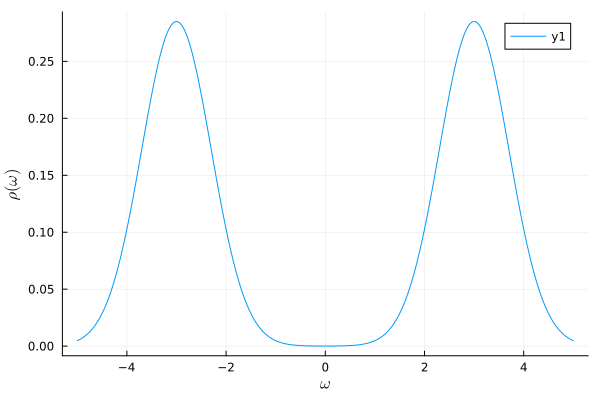

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.5*gaussian(omega, -3.0, 0.7) + 0.5*gaussian(omega, 3.0, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [ ]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     2.324746e+04     4.787038e+03
 * time: 0.01588582992553711
     1     1.474971e+04     1.438453e+03
 * time: 2.135236978530884
     2     1.372082e+04     8.124964e+02
 * time: 2.852219820022583
     3     1.241220e+04     7.074152e+02
 * time: 3.5898118019104004
     4     1.731847e+03     4.897146e+02
 * time: 4.330294847488403
     5     1.714541e+03     4.630661e+02
 * time: 4.678280830383301
     6     1.613949e+03     3.584211e+02
 * time: 5.073184967041016
     7     1.518804e+03     8.106047e+02
 * time: 5.291022777557373
     8     1.386599e+03     3.665591e+02
 * time: 5.4143688678741455
     9     1.343535e+03     4.367497e+02
 * time: 5.697694778442383
    10     1.265706e+03     7.410340e+01
 * time: 5.8296449184417725
    11     1.213809e+03     2.672634e+02
 * time: 6.034244775772095
    12     1.178985e+03     1.436568e+03
 * time: 6.221722841262817
    13     1.170784e+03     1.879703e+02
 *

   119     6.398816e+02     7.711798e+01
 * time: 30.408023834228516
   120     6.398720e+02     5.934011e+01
 * time: 30.546561002731323
   121     6.398618e+02     8.231933e+01
 * time: 30.675062894821167
   122     6.398522e+02     5.668399e+01
 * time: 30.801146984100342
   123     6.398424e+02     8.307891e+01
 * time: 30.95058298110962
   124     6.398329e+02     5.468952e+01
 * time: 31.099138975143433
   125     6.398228e+02     8.563472e+01
 * time: 31.24067187309265
   126     6.398129e+02     5.304474e+01
 * time: 31.371110916137695
   127     6.398021e+02     8.939494e+01
 * time: 31.517722845077515
   128     6.397914e+02     5.213463e+01
 * time: 31.648561000823975
   129     6.397793e+02     9.617936e+01
 * time: 31.788620948791504
   130     6.397675e+02     5.059419e+01
 * time: 31.940603971481323
   131     6.397520e+02     1.132018e+02
 * time: 32.08225679397583
   132     6.397371e+02     4.831735e+01
 * time: 32.2104709148407
   133     6.396981e+02     1.942893e+0

   240     6.334825e+02     4.889068e+01
 * time: 50.28738880157471
   241     6.334774e+02     1.039486e+02
 * time: 50.427308797836304
   242     6.334725e+02     4.679708e+01
 * time: 50.555651903152466
   243     6.334657e+02     1.241698e+02
 * time: 50.688838958740234
   244     6.334592e+02     4.503818e+01
 * time: 50.817264795303345
   245     6.334357e+02     2.391042e+02
 * time: 51.03480100631714
   246     6.334136e+02     4.533360e+01
 * time: 51.17036294937134
   247     6.333909e+02     2.403724e+02
 * time: 51.379191875457764
   248     6.333689e+02     4.356360e+01
 * time: 51.50540089607239
   249     6.333330e+02     2.998307e+02
 * time: 51.72415590286255
   250     6.332999e+02     4.282252e+01
 * time: 51.923640966415405
   251     6.332662e+02     2.915504e+02
 * time: 52.11088585853577
   252     6.332355e+02     4.631287e+01
 * time: 52.346298933029175
   253     6.332026e+02     2.949406e+02
 * time: 52.555561780929565
   254     6.331716e+02     4.782713e+01

   361     6.286809e+02     5.568935e+01
 * time: 73.9180679321289
   362     6.286799e+02     6.061545e+01
 * time: 74.05239701271057
   363     6.286789e+02     5.573831e+01
 * time: 74.20601296424866
   364     6.286780e+02     6.114077e+01
 * time: 74.34986090660095
   365     6.286770e+02     5.594511e+01
 * time: 74.47891879081726
   366     6.286760e+02     6.162341e+01
 * time: 74.61390590667725
   367     6.286750e+02     5.620497e+01
 * time: 74.73333382606506
   368     6.286740e+02     6.196333e+01
 * time: 74.87427186965942
   369     6.286729e+02     5.634496e+01
 * time: 75.0345230102539
   370     6.286719e+02     6.211672e+01
 * time: 75.16950392723083
   371     6.286709e+02     5.635635e+01
 * time: 75.30448698997498
   372     6.286699e+02     6.209290e+01
 * time: 75.43490195274353
   373     6.286689e+02     5.625465e+01
 * time: 75.5673999786377
   374     6.286678e+02     6.194265e+01
 * time: 75.71650695800781
   375     6.286668e+02     5.606488e+01
 * time: 7

   482     6.253195e+02     1.405857e+02
 * time: 94.8147439956665
   483     6.253179e+02     4.878889e+01
 * time: 94.93911385536194
   484     6.253176e+02     4.330556e+01
 * time: 95.07848691940308
   485     6.253171e+02     8.370998e+01
 * time: 95.2854859828949
   486     6.253166e+02     4.536851e+01
 * time: 95.42539596557617
   487     6.253159e+02     9.318652e+01
 * time: 95.6266438961029
   488     6.253153e+02     4.527711e+01
 * time: 95.76382780075073
   489     6.253147e+02     9.047878e+01
 * time: 95.90694284439087
   490     6.253141e+02     4.457390e+01
 * time: 96.05394387245178
   491     6.253135e+02     8.835243e+01
 * time: 96.1950318813324
   492     6.253129e+02     4.431123e+01
 * time: 96.33723878860474
   493     6.253123e+02     9.049172e+01
 * time: 96.4576678276062
   494     6.253118e+02     4.425117e+01
 * time: 96.58608198165894
   495     6.253111e+02     9.413664e+01
 * time: 96.72833180427551
   496     6.253105e+02     4.421153e+01
 * time: 96.

    99     2.365050e+02     1.464267e+02
 * time: 27.71392798423767
   100     2.362910e+02     1.667917e+02
 * time: 27.86012601852417
   101     2.359555e+02     7.325211e+01
 * time: 28.012555837631226
   102     2.356971e+02     7.116374e+01
 * time: 28.196889877319336
   103     2.355040e+02     4.644557e+01
 * time: 28.340081930160522
   104     2.353698e+02     4.164415e+01
 * time: 28.498971939086914
   105     2.352578e+02     8.825704e+01
 * time: 28.664062023162842
   106     2.351062e+02     5.415820e+01
 * time: 28.834704875946045
   107     2.349681e+02     9.775461e+01
 * time: 28.984392881393433
   108     2.346653e+02     3.999393e+01
 * time: 29.134151935577393
   109     2.344750e+02     7.782544e+01
 * time: 29.378095865249634
   110     2.343136e+02     3.970780e+01
 * time: 29.518568992614746
   111     2.342360e+02     4.312463e+01
 * time: 29.697417974472046
   112     2.340067e+02     3.949253e+01
 * time: 29.84624481201172
   113     2.339640e+02     5.141573e

   219     2.278297e+02     6.316963e+01
 * time: 52.88336682319641
   220     2.278052e+02     3.758510e+01
 * time: 53.08154487609863
   221     2.277814e+02     6.633658e+01
 * time: 53.25239586830139
   222     2.277586e+02     3.645714e+01
 * time: 53.415398836135864
   223     2.277360e+02     7.177515e+01
 * time: 53.59432888031006
   224     2.277138e+02     3.576099e+01
 * time: 53.786067962646484
   225     2.276911e+02     7.627005e+01
 * time: 53.965312004089355
   226     2.276684e+02     3.596403e+01
 * time: 54.13177990913391
   227     2.276450e+02     7.562160e+01
 * time: 54.30199694633484
   228     2.276216e+02     3.786924e+01
 * time: 54.496986865997314
   229     2.275977e+02     6.845145e+01
 * time: 54.67695999145508
   230     2.275742e+02     4.300122e+01
 * time: 54.83712291717529
   231     2.275507e+02     5.758807e+01
 * time: 54.985219955444336
   232     2.275279e+02     5.096701e+01
 * time: 55.15678286552429
   233     2.275049e+02     4.811599e+01
 *

   340     2.242696e+02     1.043751e+02
 * time: 75.2383439540863
   341     2.242580e+02     4.277806e+01
 * time: 75.42517185211182
   342     2.242428e+02     9.145160e+01
 * time: 75.64029383659363
   343     2.242294e+02     5.765155e+01
 * time: 75.82566094398499
   344     2.242134e+02     1.382718e+02
 * time: 76.06965804100037
   345     2.242003e+02     3.935645e+01
 * time: 76.21901798248291
   346     2.241744e+02     1.607871e+02
 * time: 76.4693648815155
   347     2.241557e+02     5.605090e+01
 * time: 76.62797689437866
   348     2.241523e+02     5.122352e+01
 * time: 76.78826785087585
   349     2.241480e+02     5.344803e+01
 * time: 76.9346489906311
   350     2.241444e+02     5.293554e+01
 * time: 77.11422991752625
   351     2.241415e+02     4.865723e+01
 * time: 77.27352094650269
   352     2.241391e+02     5.067453e+01
 * time: 77.46256589889526
   353     2.241364e+02     5.785377e+01
 * time: 77.64464783668518
   354     2.241336e+02     4.831435e+01
 * time: 7

   461     2.235541e+02     6.015411e+01
 * time: 101.42708802223206
   462     2.235533e+02     6.602262e+01
 * time: 101.62212991714478
   463     2.235526e+02     5.848726e+01
 * time: 101.81723284721375
   464     2.235518e+02     6.866285e+01
 * time: 102.0012879371643
   465     2.235510e+02     5.559924e+01
 * time: 102.17682886123657
   466     2.235502e+02     7.378344e+01
 * time: 102.37990498542786
   467     2.235494e+02     5.148389e+01
 * time: 102.64109587669373
   468     2.235485e+02     8.655403e+01
 * time: 102.94656491279602
   469     2.235476e+02     4.613461e+01
 * time: 103.2165949344635
   470     2.235448e+02     1.642178e+02
 * time: 103.43848490715027
   471     2.235424e+02     5.078682e+01
 * time: 103.65142798423767
   472     2.235418e+02     7.523301e+01
 * time: 103.85404682159424
   473     2.235411e+02     4.815669e+01
 * time: 104.04597187042236
   474     2.235402e+02     8.976229e+01
 * time: 104.29833102226257
   475     2.235394e+02     4.511685

    78     1.098773e+02     1.572988e+01
 * time: 33.480299949645996
    79     1.096573e+02     1.138466e+01
 * time: 33.753138065338135
    80     1.094385e+02     1.021604e+01
 * time: 33.912095069885254
    81     1.092275e+02     6.144881e+00
 * time: 34.17626595497131
    82     1.090262e+02     1.006577e+01
 * time: 34.34365797042847
    83     1.088329e+02     8.459306e+00
 * time: 34.608601093292236
    84     1.086388e+02     1.282563e+01
 * time: 34.812976121902466
    85     1.084466e+02     1.116262e+01
 * time: 35.07066512107849
    86     1.082513e+02     1.151061e+01
 * time: 35.25517702102661
    87     1.080553e+02     9.023568e+00
 * time: 35.519575119018555
    88     1.078689e+02     1.020962e+01
 * time: 35.678287982940674
    89     1.076861e+02     6.233140e+00
 * time: 35.95946216583252
    90     1.075159e+02     1.347308e+01
 * time: 36.152573108673096
    91     1.073518e+02     8.946952e+00
 * time: 36.40678906440735
    92     1.071860e+02     1.636824e+01

   199     9.217458e+01     1.940584e+01
 * time: 64.71712613105774
   200     9.212178e+01     1.690358e+01
 * time: 64.90676307678223
   201     9.202189e+01     2.622261e+01
 * time: 65.1703131198883
   202     9.192783e+01     1.133196e+01
 * time: 65.33391118049622
   203     9.181864e+01     3.022634e+01
 * time: 65.49821305274963
   204     9.171834e+01     1.073488e+01
 * time: 65.69752717018127
   205     9.155385e+01     4.157085e+01
 * time: 65.94847106933594
   206     9.140581e+01     8.101391e+00
 * time: 66.11900210380554
   207     9.054882e+01     2.739916e+01
 * time: 66.54929304122925
   208     9.041797e+01     4.063380e+01
 * time: 66.75163006782532
   209     9.036440e+01     2.768776e+01
 * time: 67.01293516159058
   210     9.032101e+01     3.463302e+01
 * time: 67.18070006370544
   211     9.030287e+01     3.125783e+01
 * time: 67.36371302604675
   212     9.017694e+01     3.753876e+01
 * time: 67.66544318199158
   213     9.006910e+01     3.459261e+01
 * time:

   320     6.917439e+01     1.343932e+01
 * time: 94.91216897964478
   321     6.905229e+01     1.669415e+01
 * time: 95.08452606201172
   322     6.894013e+01     1.707674e+01
 * time: 95.27600407600403
   323     6.883244e+01     1.600950e+01
 * time: 95.48225617408752
   324     6.872478e+01     2.030232e+01
 * time: 95.65095710754395
   325     6.861676e+01     1.572001e+01
 * time: 95.82091903686523
   326     6.850334e+01     2.200441e+01
 * time: 96.02930498123169
   327     6.838978e+01     1.394437e+01
 * time: 96.21168804168701
   328     6.827001e+01     2.250271e+01
 * time: 96.367192029953
   329     6.815405e+01     1.060337e+01
 * time: 96.5903730392456
   330     6.802002e+01     2.531353e+01
 * time: 96.76950097084045
   331     6.789311e+01     8.924693e+00
 * time: 96.95921397209167
   332     6.769860e+01     3.550017e+01
 * time: 97.14005208015442
   333     6.751341e+01     1.213368e+01
 * time: 97.30945014953613
   334     6.738824e+01     2.777022e+01
 * time: 9

   440     6.215976e+01     7.835703e+00
 * time: 117.82369709014893
   441     6.214518e+01     4.678704e+00
 * time: 117.98790502548218
   442     6.213094e+01     7.643114e+00
 * time: 118.1519660949707
   443     6.211520e+01     4.887524e+00
 * time: 118.34952902793884
   444     6.209985e+01     8.278980e+00
 * time: 118.51838898658752
   445     6.208243e+01     4.901262e+00
 * time: 118.69287204742432
   446     6.206555e+01     9.621604e+00
 * time: 118.88898515701294
   447     6.204570e+01     4.868899e+00
 * time: 119.05781316757202
   448     6.202663e+01     1.138573e+01
 * time: 119.22144198417664
   449     6.200286e+01     5.180453e+00
 * time: 119.41435313224792
   450     6.198019e+01     1.314532e+01
 * time: 119.5886549949646
   451     6.195354e+01     5.747619e+00
 * time: 119.76599216461182
   452     6.192818e+01     1.378788e+01
 * time: 119.95856595039368
   453     6.189577e+01     7.952608e+00
 * time: 120.13156700134277
   454     6.186538e+01     1.250009

    57     1.360389e+01     4.694855e+01
 * time: 22.387654066085815
    58     1.356557e+01     1.546886e+01
 * time: 22.56843400001526
    59     1.349817e+01     2.801239e+01
 * time: 22.851136922836304
    60     1.346071e+01     2.784535e+01
 * time: 23.040698051452637
    61     1.339340e+01     3.009884e+01
 * time: 23.352064847946167
    62     1.332392e+01     3.549176e+01
 * time: 23.534071922302246
    63     1.325718e+01     1.931761e+01
 * time: 23.719910860061646
    64     1.319387e+01     3.670736e+01
 * time: 23.92636203765869
    65     1.313329e+01     1.255663e+01
 * time: 24.09867000579834
    66     1.306759e+01     4.553628e+01
 * time: 24.316086053848267
    67     1.299727e+01     1.035510e+01
 * time: 24.497835874557495
    68     1.291838e+01     4.839146e+01
 * time: 24.702059030532837
    69     1.283877e+01     3.571244e+00
 * time: 24.878201961517334
    70     1.275999e+01     3.943555e+01
 * time: 25.057965993881226
    71     1.269026e+01     8.812812e

   177     1.173694e+01     6.848074e+00
 * time: 46.28993201255798
   178     1.173577e+01     9.201266e+00
 * time: 46.50212788581848
   179     1.173467e+01     6.826486e+00
 * time: 46.680551052093506
   180     1.173312e+01     9.922217e+00
 * time: 46.89146399497986
   181     1.173176e+01     6.951871e+00
 * time: 47.07221484184265
   182     1.171774e+01     6.286168e+00
 * time: 47.36133790016174
   183     1.171739e+01     5.338363e+00
 * time: 47.606549978256226
   184     1.171321e+01     9.617333e+00
 * time: 47.91788387298584
   185     1.171118e+01     1.329337e+01
 * time: 48.13831186294556
   186     1.170812e+01     5.884677e+00
 * time: 48.48771595954895
   187     1.170644e+01     3.792523e+00
 * time: 48.71574687957764
   188     1.170351e+01     5.933333e+00
 * time: 49.051246881484985
   189     1.170147e+01     6.475083e+00
 * time: 49.26397705078125
   190     1.169906e+01     3.814293e+00
 * time: 49.496484994888306
   191     1.169729e+01     4.510161e+00
 * 

   298     1.162652e+01     8.005209e+00
 * time: 72.89387702941895
   299     1.162582e+01     3.824709e+00
 * time: 73.11755585670471
   300     1.162512e+01     8.237741e+00
 * time: 73.3760929107666
   301     1.162441e+01     3.991744e+00
 * time: 73.5747640132904
   302     1.162370e+01     8.465672e+00
 * time: 73.81321287155151
   303     1.162300e+01     4.154517e+00
 * time: 73.99635887145996
   304     1.162228e+01     8.686063e+00
 * time: 74.21102595329285
   305     1.162157e+01     4.348908e+00
 * time: 74.39160990715027
   306     1.162086e+01     8.896716e+00
 * time: 74.57235503196716
   307     1.162014e+01     4.545727e+00
 * time: 74.78820300102234
   308     1.161942e+01     9.096054e+00
 * time: 74.97616505622864
   309     1.161871e+01     4.730851e+00
 * time: 75.18816089630127
   310     1.161798e+01     9.282967e+00
 * time: 75.362459897995
   311     1.161727e+01     4.902793e+00
 * time: 75.57104301452637
   312     1.161654e+01     9.456649e+00
 * time: 75

   419     1.152237e+01     2.291994e+01
 * time: 107.58138990402222
   420     1.152215e+01     2.023967e+01
 * time: 107.96108293533325
   421     1.152194e+01     2.307624e+01
 * time: 108.3487000465393
   422     1.152171e+01     2.033585e+01
 * time: 108.72845983505249
   423     1.152149e+01     2.326309e+01
 * time: 109.11005306243896
   424     1.152126e+01     2.049971e+01
 * time: 109.48415994644165
   425     1.152103e+01     2.345297e+01
 * time: 109.84940505027771
   426     1.152079e+01     2.067987e+01
 * time: 110.14784598350525
   427     1.152056e+01     2.365286e+01
 * time: 110.5293140411377
   428     1.152051e+01     2.328473e+01
 * time: 110.73289489746094
   429     1.151934e+01     1.833382e+01
 * time: 111.00849795341492
   430     1.151842e+01     2.425140e+01
 * time: 111.79386401176453
   431     1.151758e+01     1.996073e+01
 * time: 112.07476806640625
   432     1.151690e+01     2.507335e+01
 * time: 112.75341701507568
   433     1.151625e+01     2.110628

    36     4.592616e+02     1.706272e+02
 * time: 18.591876983642578
    37     4.576376e+02     1.015205e+02
 * time: 20.062206983566284
    38     4.551561e+02     1.165041e+02
 * time: 21.13286280632019
    39     4.545659e+02     9.086695e+01
 * time: 22.937318801879883
    40     4.533346e+02     2.238074e+02
 * time: 25.06663990020752
    41     4.517460e+02     1.051896e+02
 * time: 27.69328784942627
    42     4.506355e+02     3.188028e+02
 * time: 29.40881896018982
    43     4.482036e+02     2.005250e+02
 * time: 32.4750759601593
    44     4.474328e+02     9.833762e+01
 * time: 33.549054861068726
    45     4.460944e+02     5.251803e+02
 * time: 34.07704401016235
    46     4.422806e+02     9.344094e+01
 * time: 36.22295594215393
    47     4.361761e+02     1.428635e+03
 * time: 36.52511191368103
    48     4.313055e+02     1.350307e+02
 * time: 39.992583990097046
    49     4.312801e+02     1.175411e+02
 * time: 40.51853084564209
    50     4.310181e+02     3.808898e+02
 * 

   156     3.739870e+02     1.666071e+02
 * time: 307.41732597351074
   157     3.739869e+02     1.752657e+02
 * time: 311.6760218143463
   158     3.739867e+02     1.667043e+02
 * time: 314.85434579849243
   159     3.739866e+02     1.752350e+02
 * time: 318.8334438800812
   160     3.739864e+02     1.667987e+02
 * time: 321.9092478752136
   161     3.739863e+02     1.751689e+02
 * time: 325.8731098175049
   162     3.739862e+02     1.726418e+02
 * time: 328.8538999557495
   163     3.739862e+02     1.760741e+02
 * time: 332.59517884254456
   164     3.739862e+02     1.722240e+02
 * time: 336.50062680244446
   165     3.739861e+02     1.754225e+02
 * time: 340.24066495895386
   166     3.739861e+02     1.697068e+02
 * time: 343.8068768978119
   167     3.739860e+02     1.742058e+02
 * time: 347.83849692344666
   168     3.739860e+02     1.792427e+02
 * time: 351.37067580223083
   169     3.739859e+02     1.740718e+02
 * time: 355.7639060020447
   170     3.739859e+02     1.769393e+02


    40     2.169450e+03     1.736213e+02
 * time: 42.82463812828064
    41     2.169121e+03     2.877141e+02
 * time: 45.331876039505005
    42     2.169055e+03     2.102196e+02
 * time: 49.336491107940674
    43     2.169020e+03     1.810898e+02
 * time: 52.61738395690918
    44     2.168013e+03     4.078658e+02
 * time: 56.86054515838623
    45     2.167906e+03     1.788891e+02
 * time: 61.75692296028137
    46     2.167772e+03     6.007461e+02
 * time: 67.2055230140686
    47     2.167527e+03     1.865317e+02
 * time: 71.95174813270569
    48     2.167053e+03     4.902398e+02
 * time: 76.49442100524902
    49     2.166984e+03     1.714153e+02
 * time: 81.11544704437256
    50     2.166960e+03     1.767477e+02
 * time: 86.38682913780212
    51     2.166938e+03     3.004798e+02
 * time: 90.52493715286255
    52     2.166921e+03     1.908316e+02
 * time: 95.58505010604858
    53     2.166240e+03     1.121120e+03
 * time: 99.71527409553528
    54     2.165986e+03     2.469610e+02
 * tim

   160     2.165027e+03     2.964286e+02
 * time: 706.0443320274353
   161     2.165027e+03     3.050009e+02
 * time: 712.0707890987396
   162     2.165027e+03     2.827058e+02
 * time: 717.0227410793304
   163     2.165027e+03     3.050163e+02
 * time: 723.5094170570374
   164     2.165027e+03     3.269960e+02
 * time: 728.0730030536652
   165     2.165027e+03     3.054151e+02
 * time: 731.9958579540253
   166     2.165027e+03     3.268445e+02
 * time: 736.220682144165
   167     2.165027e+03     3.058253e+02
 * time: 740.0039899349213
   168     2.165027e+03     3.230549e+02
 * time: 744.1065511703491
   169     2.165027e+03     3.060909e+02
 * time: 747.7612669467926
   170     2.165027e+03     3.230937e+02
 * time: 751.8355741500854
   171     2.165026e+03     3.063724e+02
 * time: 755.5371429920197
   172     2.165026e+03     3.167801e+02
 * time: 759.4408650398254
   173     2.165026e+03     3.063635e+02
 * time: 762.8208589553833
   174     2.165026e+03     3.177991e+02
 * time:

    32     1.305180e+03     3.411458e+02
 * time: 17.77287197113037
    33     9.857195e+02     1.362321e+02
 * time: 18.01047396659851
    34     9.387388e+02     4.708047e+01
 * time: 18.251679182052612
    35     9.349134e+02     2.272203e+01
 * time: 18.471009969711304
    36     8.879588e+02     2.452498e+01
 * time: 19.04999804496765
    37     8.730407e+02     9.143372e+01
 * time: 19.367089986801147
    38     8.623400e+02     6.521168e+01
 * time: 19.696832180023193
    39     8.531808e+02     4.706419e+01
 * time: 20.031026124954224
    40     8.452111e+02     5.898158e+01
 * time: 20.262465953826904
    41     8.369935e+02     2.347123e+01
 * time: 20.475759029388428
    42     8.317302e+02     7.075476e+01
 * time: 20.881689071655273
    43     8.274133e+02     3.047916e+01
 * time: 21.315513134002686
    44     8.238754e+02     8.089256e+01
 * time: 21.687364101409912
    45     8.203247e+02     3.441368e+01
 * time: 21.934446096420288
    46     8.173504e+02     2.679353e

   152     7.830699e+02     4.443103e+00
 * time: 49.026061058044434
   153     7.828525e+02     7.157757e+00
 * time: 49.24594712257385
   154     7.826619e+02     5.275839e+00
 * time: 49.440447092056274
   155     7.824532e+02     6.492792e+00
 * time: 49.66205096244812
   156     7.822833e+02     5.643193e+00
 * time: 49.855494022369385
   157     7.818941e+02     1.387881e+01
 * time: 50.07620811462402
   158     7.817244e+02     8.606569e+00
 * time: 50.298091173172
   159     7.815780e+02     4.255545e+00
 * time: 50.49458599090576
   160     7.812569e+02     1.527806e+01
 * time: 50.82414197921753
   161     7.810106e+02     4.557386e+00
 * time: 51.10959815979004
   162     7.801618e+02     1.481755e+01
 * time: 51.43787217140198
   163     7.800198e+02     1.364771e+01
 * time: 51.66564607620239
   164     7.795924e+02     8.312114e+00
 * time: 51.96680307388306
   165     7.793342e+02     8.356105e+00
 * time: 52.18514800071716
   166     7.791775e+02     5.953220e+00
 * tim

   273     7.664100e+02     2.194735e+00
 * time: 78.33197617530823
   274     7.663193e+02     1.036605e+01
 * time: 78.58246898651123
   275     7.662280e+02     2.208874e+00
 * time: 78.97334218025208
   276     7.661403e+02     1.014179e+01
 * time: 79.22563910484314
   277     7.660509e+02     1.772161e+00
 * time: 79.56428503990173
   278     7.659629e+02     9.769711e+00
 * time: 79.79531216621399
   279     7.658725e+02     1.218255e+00
 * time: 80.10300207138062
   280     7.657856e+02     9.395066e+00
 * time: 80.41055512428284
   281     7.656968e+02     1.110555e+00
 * time: 80.7497091293335
   282     7.656139e+02     9.272212e+00
 * time: 80.9769241809845
   283     7.655298e+02     1.581997e+00
 * time: 81.29324698448181
   284     7.654505e+02     9.485675e+00
 * time: 81.51908707618713
   285     7.653698e+02     2.266385e+00
 * time: 81.83600807189941
   286     7.652910e+02     9.744695e+00
 * time: 82.05209803581238
   287     7.652101e+02     2.485435e+00
 * time: 

   394     7.595070e+02     9.275996e+00
 * time: 110.78229403495789
   395     7.594665e+02     1.421079e+00
 * time: 111.10676503181458
   396     7.594271e+02     9.361780e+00
 * time: 111.30129504203796
   397     7.593866e+02     1.483556e+00
 * time: 111.6351330280304
   398     7.593474e+02     9.398154e+00
 * time: 111.86401510238647
   399     7.593071e+02     1.506630e+00
 * time: 112.17128109931946
   400     7.592683e+02     9.384871e+00
 * time: 112.38747906684875
   401     7.592284e+02     1.451026e+00
 * time: 112.69524097442627
   402     7.591900e+02     9.341925e+00
 * time: 112.91432213783264
   403     7.591506e+02     1.355312e+00
 * time: 113.21226811408997
   404     7.591125e+02     9.336818e+00
 * time: 113.43188214302063
   405     7.590733e+02     1.299032e+00
 * time: 113.72867703437805
   406     7.590352e+02     9.399423e+00
 * time: 113.94770407676697
   407     7.589960e+02     1.299651e+00
 * time: 114.25535106658936
   408     7.589578e+02     9.48832

    11     2.538389e+03     1.034128e+01
 * time: 7.806555986404419
    12     2.525140e+03     1.996476e+01
 * time: 8.048482894897461
    13     2.482079e+03     5.800846e+01
 * time: 8.723022937774658
    14     2.477128e+03     6.073049e+01
 * time: 9.048348903656006
    15     2.462398e+03     6.530387e+01
 * time: 9.287791013717651
    16     2.443100e+03     4.433053e+01
 * time: 9.521039009094238
    17     2.435839e+03     9.847790e+00
 * time: 9.754174947738647
    18     2.433406e+03     9.014115e+00
 * time: 10.095890045166016
    19     2.430525e+03     1.293544e+01
 * time: 10.47429895401001
    20     2.427287e+03     3.149148e+01
 * time: 10.815638065338135
    21     2.423663e+03     1.819796e+01
 * time: 11.048875093460083
    22     2.418224e+03     2.214931e+01
 * time: 11.276274919509888
    23     2.412090e+03     2.108070e+01
 * time: 11.602779865264893
    24     2.402758e+03     3.585701e+01
 * time: 11.83279299736023
    25     2.389839e+03     3.638779e+01
 *

   131     1.561722e+01     3.172714e+00
 * time: 52.32205891609192
   132     1.518477e+01     5.158474e+00
 * time: 52.538482904434204
   133     1.478027e+01     8.194235e+00
 * time: 52.77651286125183
   134     1.376206e+01     4.891125e+00
 * time: 53.10050988197327
   135     1.323933e+01     4.944679e+00
 * time: 53.44805192947388
   136     1.290190e+01     4.937347e+00
 * time: 54.227806091308594
   137     1.284132e+01     5.111957e+00
 * time: 54.462317943573
   138     1.222780e+01     5.039557e+00
 * time: 54.67449593544006
   139     1.199702e+01     2.052908e+00
 * time: 55.01610708236694
   140     1.160225e+01     4.076072e+00
 * time: 55.36741399765015
   141     1.144224e+01     2.076299e+00
 * time: 55.56912088394165
   142     1.130845e+01     2.593303e+00
 * time: 55.92440891265869
   143     1.110088e+01     3.386667e+00
 * time: 56.24643898010254
   144     1.098639e+01     2.804738e+00
 * time: 56.476181983947754
   145     1.084231e+01     2.492446e+00
 * tim

   252     4.832283e+00     1.545013e+00
 * time: 84.83342409133911
   253     4.812773e+00     6.975669e-01
 * time: 85.07158303260803
   254     4.793731e+00     8.650598e-01
 * time: 85.28301286697388
   255     4.705121e+00     2.678641e+00
 * time: 85.65280985832214
   256     4.659959e+00     1.461437e+00
 * time: 85.99271202087402
   257     4.504237e+00     2.472643e+00
 * time: 86.34251689910889
   258     4.490757e+00     2.572074e+00
 * time: 86.68738007545471
   259     4.476867e+00     2.700458e+00
 * time: 86.92175102233887
   260     4.425026e+00     2.086186e+00
 * time: 87.17803692817688
   261     4.408978e+00     2.270399e+00
 * time: 87.50220394134521
   262     4.397268e+00     1.772589e+00
 * time: 87.74115300178528
   263     4.289740e+00     4.382237e+00
 * time: 88.09917402267456
   264     4.266226e+00     4.505318e+00
 * time: 88.53258895874023
   265     4.195675e+00     3.195993e+00
 * time: 88.76578903198242
   266     4.119819e+00     2.072036e+00
 * time

   372     1.631826e+00     1.532083e+00
 * time: 127.69261288642883
   373     1.631737e+00     1.483485e+00
 * time: 128.0493619441986
   374     1.631684e+00     1.456903e+00
 * time: 128.3638880252838
   375     1.631662e+00     1.436839e+00
 * time: 128.5945909023285
   376     1.631636e+00     1.424566e+00
 * time: 129.04283499717712
   377     1.631622e+00     1.405810e+00
 * time: 129.40787887573242
   378     1.631604e+00     1.394581e+00
 * time: 130.0880298614502
   379     1.631590e+00     1.372014e+00
 * time: 130.44795107841492
   380     1.631582e+00     1.374071e+00
 * time: 130.78545093536377
   381     1.631574e+00     1.354825e+00
 * time: 131.25179386138916
   382     1.631567e+00     1.357117e+00
 * time: 131.69383788108826
   383     1.631560e+00     1.338632e+00
 * time: 132.41227197647095
   384     1.631553e+00     1.340501e+00
 * time: 132.74628901481628
   385     1.631546e+00     1.321692e+00
 * time: 133.20771193504333
   386     1.631539e+00     1.323509e+

   492     1.537783e+00     1.749839e-01
 * time: 161.2392840385437
   493     1.537677e+00     1.456681e-01
 * time: 161.4756760597229
   494     1.537570e+00     1.813255e-01
 * time: 161.72501492500305
   495     1.537462e+00     1.469234e-01
 * time: 161.94734406471252
   496     1.537354e+00     1.853812e-01
 * time: 162.19406390190125
   497     1.537245e+00     1.450596e-01
 * time: 162.45819187164307
   498     1.537136e+00     1.856964e-01
 * time: 162.72406792640686
   499     1.537026e+00     1.407888e-01
 * time: 162.93426394462585
   500     1.536916e+00     1.825330e-01
 * time: 163.1716229915619
Faild to optimize!
max_theta=39.83203996048667422479280419422515689631
hardy optimization was failure.
H=9
Iter     Function value   Gradient norm 
     0     2.324746e+04     1.199026e+04
 * time: 0.0002810955047607422
     1     1.593629e+04     1.160823e+03
 * time: 3.542189121246338
     2     1.223701e+04     9.930440e+02
 * time: 4.963332176208496
     3     1.166605e+04   

   109     6.170773e+02     2.874405e+02
 * time: 165.54620909690857
   110     6.170771e+02     2.333964e+02
 * time: 169.19566416740417
   111     6.170768e+02     2.873493e+02
 * time: 170.78766512870789
   112     6.170766e+02     2.334411e+02
 * time: 174.3752989768982
   113     6.170764e+02     2.872914e+02
 * time: 175.9099681377411
   114     6.170761e+02     2.334940e+02
 * time: 179.5602731704712
   115     6.170759e+02     2.872667e+02
 * time: 181.08210396766663
   116     6.170757e+02     2.335583e+02
 * time: 184.51457715034485
   117     6.170755e+02     2.872906e+02
 * time: 185.99136018753052
   118     6.170752e+02     2.336582e+02
 * time: 189.42807698249817
   119     6.170750e+02     2.874579e+02
 * time: 190.8717851638794
   120     6.170748e+02     2.265325e+02
 * time: 194.0877161026001
   121     6.170746e+02     2.589738e+02
 * time: 195.57379508018494
   122     6.170746e+02     2.507207e+02
 * time: 197.26342606544495
   123     6.170745e+02     2.339847e+0

    29     1.908149e+03     1.948072e+02
 * time: 23.56178593635559
    30     1.545355e+03     1.785975e+02
 * time: 24.09825301170349
    31     9.567577e+02     3.437697e+02
 * time: 24.886579990386963
    32     6.910252e+02     3.411223e+02
 * time: 25.679712057113647
    33     6.157229e+02     9.854640e+02
 * time: 26.572715997695923
    34     6.013932e+02     3.200010e+02
 * time: 28.794100999832153
    35     3.698385e+02     1.418072e+02
 * time: 29.21537208557129
    36     3.426858e+02     1.527073e+02
 * time: 29.47672200202942
    37     3.145048e+02     1.314443e+02
 * time: 29.743696928024292
    38     2.878849e+02     1.249990e+02
 * time: 30.41978406906128
    39     2.804068e+02     7.758784e+01
 * time: 31.304399967193604
    40     2.784442e+02     4.684047e+01
 * time: 31.58552312850952
    41     2.716794e+02     2.844908e+02
 * time: 32.466607093811035
    42     2.704439e+02     1.506923e+02
 * time: 32.99643397331238
    43     2.668584e+02     5.190390e+01


   149     2.385045e+02     1.942206e+03
 * time: 333.59185004234314
   150     2.384939e+02     1.053647e+03
 * time: 341.78154492378235
   151     2.384839e+02     2.170468e+03
 * time: 347.1561391353607
   152     2.384686e+02     1.091701e+03
 * time: 355.4169089794159
   153     2.384428e+02     7.485193e+02
 * time: 360.4676899909973
   154     2.384410e+02     1.107473e+03
 * time: 365.15149998664856
   155     2.384393e+02     1.470359e+03
 * time: 370.5717351436615
   156     2.384377e+02     1.120111e+03
 * time: 378.38729095458984
   157     2.384316e+02     1.617096e+03
 * time: 383.7045669555664
   158     2.384288e+02     1.148442e+03
 * time: 391.56478095054626
   159     2.384271e+02     8.032714e+02
 * time: 396.9888401031494
   160     2.384256e+02     1.147529e+03
 * time: 401.58629298210144
   161     2.384212e+02     5.676985e+01
 * time: 406.8566401004791
   162     2.384062e+02     1.207865e+03
 * time: 411.83618092536926
   163     2.384059e+02     1.142164e+03


   270     2.384055e+02     1.220875e+03
 * time: 814.0347769260406
   271     2.384055e+02     1.210626e+03
 * time: 817.8134560585022
   272     2.384055e+02     1.220909e+03
 * time: 821.3818900585175
   273     2.384055e+02     1.210701e+03
 * time: 825.167319059372
   274     2.384055e+02     1.220922e+03
 * time: 828.7125689983368
   275     2.384055e+02     1.211049e+03
 * time: 832.4877591133118
   276     2.384055e+02     1.213810e+03
 * time: 836.4473440647125
   277     2.384055e+02     1.225944e+03
 * time: 840.3953740596771
   278     2.384055e+02     1.213850e+03
 * time: 845.1887290477753
   279     2.384055e+02     1.225731e+03
 * time: 848.8056969642639
   280     2.384055e+02     1.213863e+03
 * time: 853.1346590518951
   281     2.384055e+02     1.225477e+03
 * time: 856.9547500610352
   282     2.384055e+02     1.213876e+03
 * time: 861.5077769756317
   283     2.384055e+02     1.216821e+03
 * time: 865.097715139389
   284     2.384055e+02     1.196737e+03
 * time: 

   390     3.901112e+01     2.510734e+02
 * time: 1093.109220981598
   391     3.895156e+01     2.626877e+02
 * time: 1093.3557839393616
   392     3.882813e+01     1.738569e+02
 * time: 1093.6154460906982
   393     3.872144e+01     2.521904e+01
 * time: 1093.8756649494171
   394     3.820914e+01     2.619530e+02
 * time: 1094.2479040622711
   395     3.811493e+01     3.160803e+02
 * time: 1094.4738309383392
   396     3.808260e+01     2.802763e+02
 * time: 1094.7224850654602
   397     3.803367e+01     2.000913e+02
 * time: 1094.9754400253296
   398     3.799123e+01     1.854154e+02
 * time: 1095.2287349700928
   399     3.780919e+01     2.335183e+02
 * time: 1095.6030271053314
   400     3.775101e+01     2.000895e+02
 * time: 1096.079113960266
   401     3.754253e+01     1.859331e+02
 * time: 1096.465616941452
   402     3.730035e+01     4.174842e+02
 * time: 1096.8557670116425
   403     3.725745e+01     4.268853e+02
 * time: 1097.0801780223846
   404     3.695854e+01     8.128283e

     7     6.842689e+03     4.457202e+02
 * time: 13.432197093963623
     8     6.317315e+03     1.797684e+02
 * time: 15.234462022781372
     9     4.825230e+03     1.943729e+02
 * time: 16.000205039978027
    10     4.270339e+03     3.641010e+02
 * time: 17.606234073638916
    11     3.350084e+03     4.310258e+02
 * time: 18.506508111953735
    12     3.228753e+03     4.271350e+02
 * time: 19.454530000686646
    13     2.985030e+03     3.895157e+02
 * time: 19.958177089691162
    14     2.429981e+03     2.387528e+02
 * time: 20.22005605697632
    15     2.275728e+03     7.417543e+01
 * time: 20.479223012924194
    16     2.258497e+03     5.435595e+01
 * time: 20.749834060668945
    17     2.220079e+03     4.624888e+01
 * time: 21.155335187911987
    18     2.206531e+03     4.142582e+01
 * time: 21.425729036331177
    19     1.879077e+03     1.617918e+02
 * time: 21.819890022277832
    20     1.214544e+03     1.438651e+02
 * time: 22.983827114105225
    21     6.784762e+02     1.64191

   127     6.284273e+01     2.288418e+00
 * time: 63.27102303504944
   128     6.279134e+01     2.339053e+00
 * time: 63.52587008476257
   129     6.273581e+01     2.312872e+00
 * time: 63.79112720489502
   130     6.267897e+01     2.136439e+00
 * time: 64.05844402313232
   131     6.261800e+01     2.293183e+00
 * time: 64.3228771686554
   132     6.255586e+01     1.825873e+00
 * time: 64.59214520454407
   133     6.248943e+01     2.243938e+00
 * time: 64.86433720588684
   134     6.242189e+01     1.834670e+00
 * time: 65.12311720848083
   135     6.234950e+01     2.209354e+00
 * time: 65.36406421661377
   136     6.227577e+01     1.974994e+00
 * time: 65.62044405937195
   137     6.219598e+01     2.346247e+00
 * time: 65.88254714012146
   138     6.211429e+01     2.081830e+00
 * time: 66.1559522151947
   139     6.202485e+01     2.503281e+00
 * time: 66.42040920257568
   140     6.193331e+01     2.178820e+00
 * time: 66.69536018371582
   141     6.183260e+01     2.623446e+00
 * time: 

   248     1.540508e+01     1.604688e+00
 * time: 116.6389172077179
   249     1.536349e+01     4.000371e+00
 * time: 116.95114707946777
   250     1.532044e+01     1.446913e+00
 * time: 117.25917506217957
   251     1.527467e+01     4.302033e+00
 * time: 117.55558705329895
   252     1.522830e+01     1.186165e+00
 * time: 117.81599402427673
   253     1.517855e+01     4.847281e+00
 * time: 118.1090919971466
   254     1.512855e+01     1.344799e+00
 * time: 118.4321219921112
   255     1.507210e+01     5.809080e+00
 * time: 118.72881412506104
   256     1.501554e+01     2.114148e+00
 * time: 119.03765916824341
   257     1.494272e+01     7.561257e+00
 * time: 119.34548711776733
   258     1.486847e+01     3.062422e+00
 * time: 119.65272521972656
   259     1.477056e+01     9.675334e+00
 * time: 119.96101117134094
   260     1.467490e+01     3.586756e+00
 * time: 120.22973704338074
   261     1.460496e+01     7.192053e+00
 * time: 120.53014516830444
   262     1.452202e+01     4.179483e

   368     5.268451e+00     2.006581e+00
 * time: 162.13319420814514
   369     5.261187e+00     6.399130e-01
 * time: 162.413428068161
   370     5.254007e+00     1.906320e+00
 * time: 162.68158411979675
   371     5.247014e+00     6.205372e-01
 * time: 162.94303512573242
   372     5.240093e+00     1.886221e+00
 * time: 163.18305206298828
   373     5.233349e+00     4.974620e-01
 * time: 163.44104599952698
   374     5.226666e+00     1.938820e+00
 * time: 163.70494198799133
   375     5.220155e+00     3.234370e-01
 * time: 163.9728560447693
   376     5.213697e+00     2.006501e+00
 * time: 164.2382390499115
   377     5.207405e+00     3.819941e-01
 * time: 164.51427912712097
   378     5.201162e+00     2.034935e+00
 * time: 164.7856640815735
   379     5.195077e+00     4.695966e-01
 * time: 165.04512000083923
   380     5.189035e+00     2.012287e+00
 * time: 165.28664207458496
   381     5.183140e+00     4.926935e-01
 * time: 165.5447061061859
   382     5.177280e+00     1.960539e+00

   488     4.537927e+00     1.565825e+00
 * time: 193.97625017166138
   489     4.518162e+00     5.662068e+00
 * time: 194.37406206130981
   490     4.495748e+00     2.965132e+00
 * time: 194.77812600135803
   491     4.488034e+00     3.371316e+00
 * time: 195.18394112586975
   492     4.195255e+00     2.444695e+01
 * time: 196.07834100723267
   493     3.823678e+00     1.310234e+01
 * time: 196.87806701660156
   494     2.609838e+00     1.576892e+01
 * time: 197.41287517547607
   495     2.178663e+00     2.044013e+01
 * time: 198.19236302375793
   496     1.904115e+00     1.602160e+01
 * time: 198.62054920196533
   497     1.601960e+00     1.093936e+01
 * time: 198.9178590774536
   498     1.579640e+00     9.059263e+00
 * time: 199.2101230621338
   499     1.569634e+00     6.969328e+00
 * time: 199.49389910697937
   500     1.558017e+00     1.842512e+00
 * time: 199.8870120048523
Faild to optimize!
max_theta=110.6698769703863570395995642149467644455
hardy optimization was failure.
H=1

    76     3.642149e+02     5.635565e+00
 * time: 44.811229944229126
    77     3.636731e+02     9.481065e+00
 * time: 45.10370492935181
    78     3.631235e+02     9.101136e+00
 * time: 45.39361906051636
    79     3.625386e+02     1.435262e+01
 * time: 45.681724071502686
    80     3.617219e+02     1.239108e+01
 * time: 45.96870708465576
    81     3.607871e+02     1.114353e+01
 * time: 46.26079511642456
    82     3.597188e+02     9.407187e+00
 * time: 46.54993915557861
    83     3.584336e+02     1.412394e+01
 * time: 46.83549404144287
    84     3.570185e+02     5.301131e+00
 * time: 47.1325900554657
    85     3.554183e+02     1.339133e+01
 * time: 47.423763036727905
    86     3.537024e+02     9.139660e+00
 * time: 47.710906982421875
    87     3.520212e+02     9.990746e+00
 * time: 48.00039601325989
    88     3.505406e+02     1.049489e+01
 * time: 48.28773593902588
    89     3.495589e+02     4.267205e+00
 * time: 48.580897092819214
    90     3.468154e+02     3.358494e+00
 * 

   197     2.584153e+02     4.073611e+01
 * time: 99.26012206077576
   198     2.553003e+02     1.105735e+01
 * time: 99.67452001571655
   199     2.549173e+02     2.366311e+01
 * time: 100.22693705558777
   200     2.536666e+02     1.163110e+01
 * time: 100.94238305091858
   201     2.525842e+02     4.235792e+02
 * time: 102.2481119632721
   202     2.523907e+02     4.086795e+02
 * time: 103.310702085495
   203     2.523440e+02     4.081785e+02
 * time: 104.8477611541748
   204     2.522200e+02     4.036050e+02
 * time: 106.34286594390869
   205     2.521349e+02     3.967505e+02
 * time: 108.3949019908905
   206     2.520242e+02     3.915059e+02
 * time: 111.5229971408844
   207     2.519968e+02     3.893041e+02
 * time: 116.16417503356934
   208     2.519119e+02     3.809924e+02
 * time: 118.91154313087463
   209     2.518921e+02     3.809694e+02
 * time: 122.38175106048584
   210     2.518643e+02     3.799452e+02
 * time: 125.48017001152039
   211     2.518245e+02     3.762034e+02
 

    32     2.437872e+03     1.822346e+01
 * time: 35.40695405006409
    33     2.436034e+03     1.204355e+01
 * time: 35.92764616012573
    34     2.432699e+03     1.862325e+01
 * time: 37.24825310707092
    35     2.432135e+03     1.686298e+01
 * time: 38.903441190719604
    36     2.431727e+03     1.756398e+01
 * time: 40.35227704048157
    37     1.615279e+03     4.681966e+02
 * time: 41.943608045578
    38     1.573998e+03     4.618058e+02
 * time: 42.74585199356079
    39     1.557055e+03     4.806729e+02
 * time: 43.825987100601196
    40     1.520210e+03     4.727815e+02
 * time: 44.445528984069824
    41     1.410375e+03     4.924970e+02
 * time: 44.910874128341675
    42     1.359464e+03     4.759745e+02
 * time: 45.76447319984436
    43     9.188163e+02     2.920579e+02
 * time: 46.41106605529785
    44     9.100705e+02     4.024675e+02
 * time: 47.211278200149536
    45     6.133152e+02     3.222737e+02
 * time: 47.52680516242981
    46     4.783259e+02     2.259296e+02
 * t

   153     1.734416e+02     5.839775e+00
 * time: 90.94498109817505
   154     1.733813e+02     7.136478e+00
 * time: 91.29615616798401
   155     1.727591e+02     7.699694e+01
 * time: 91.79882717132568
   156     1.726798e+02     6.459380e+01
 * time: 92.46518802642822
   157     1.724664e+02     2.395250e+01
 * time: 92.80056500434875
   158     1.724234e+02     3.843476e+01
 * time: 93.15223908424377
   159     1.722224e+02     1.909716e+01
 * time: 93.49676513671875
   160     1.721851e+02     1.584581e+01
 * time: 93.82719802856445
   161     1.720929e+02     2.635301e+01
 * time: 94.3077449798584
   162     1.720639e+02     3.451494e+01
 * time: 94.62596011161804
   163     1.719927e+02     1.415560e+01
 * time: 94.96491408348083
   164     1.719418e+02     1.099530e+01
 * time: 95.36600518226624
   165     1.718357e+02     3.029327e+01
 * time: 95.93817806243896
   166     1.717684e+02     2.036646e+01
 * time: 96.28822803497314
   167     1.715492e+02     1.077915e+02
 * time:

   273     1.650689e+02     9.181364e+00
 * time: 143.34584712982178
   274     1.650607e+02     1.586171e+01
 * time: 143.65951800346375
   275     1.650530e+02     1.489528e+01
 * time: 143.96182918548584
   276     1.650373e+02     1.173457e+01
 * time: 144.26669716835022
   277     1.650238e+02     6.938425e+00
 * time: 144.593111038208
   278     1.649973e+02     2.468631e+01
 * time: 144.89418411254883
   279     1.649780e+02     2.695041e+01
 * time: 145.19741010665894
   280     1.649700e+02     2.267174e+01
 * time: 145.50289916992188
   281     1.649563e+02     8.256810e+00
 * time: 145.82449913024902
   282     1.649448e+02     7.234963e+00
 * time: 146.12724018096924
   283     1.649160e+02     3.259306e+01
 * time: 146.5818691253662
   284     1.648954e+02     3.087357e+01
 * time: 146.90521502494812
   285     1.648149e+02     1.093876e+02
 * time: 147.50501799583435
   286     1.648018e+02     1.113288e+02
 * time: 147.81353616714478
   287     1.647424e+02     2.564489e

   393     1.599834e+02     1.585575e+01
 * time: 188.74393916130066
   394     1.597038e+02     2.090528e+02
 * time: 189.20167303085327
   395     1.595481e+02     1.019147e+02
 * time: 189.67162013053894
   396     1.595052e+02     1.183694e+02
 * time: 189.9901270866394
   397     1.594120e+02     6.934587e+01
 * time: 190.29166412353516
   398     1.593921e+02     3.180642e+01
 * time: 190.60421705245972
   399     1.593794e+02     5.513338e+01
 * time: 190.92571210861206
   400     1.593610e+02     3.917994e+01
 * time: 191.22609615325928
   401     1.593400e+02     2.800784e+01
 * time: 191.53663611412048
   402     1.593198e+02     1.663047e+01
 * time: 191.84822416305542
   403     1.593008e+02     1.315682e+01
 * time: 192.15171718597412
   404     1.592826e+02     2.533994e+01
 * time: 192.45846009254456
   405     1.592634e+02     3.040383e+01
 * time: 192.78128814697266
   406     1.592432e+02     3.351697e+01
 * time: 193.0886311531067
   407     1.592213e+02     2.840198

     0     2.324746e+04     1.247869e+04
 * time: 0.0003039836883544922
     1     1.860203e+04     8.632366e+02
 * time: 4.768078088760376
     2     7.892987e+03     2.832683e+02
 * time: 7.30804705619812
     3     7.889883e+03     4.164886e+02
 * time: 9.472117900848389
     4     6.973176e+03     1.759382e+02
 * time: 11.089128017425537
     5     3.684696e+03     2.714577e+02
 * time: 12.354864120483398
     6     3.500645e+03     2.659242e+02
 * time: 15.893557071685791
     7     3.306901e+03     2.324942e+02
 * time: 17.80089497566223
     8     3.154074e+03     1.482676e+02
 * time: 18.326496124267578
     9     3.086310e+03     8.898732e+01
 * time: 18.68354892730713
    10     2.980634e+03     4.208992e+02
 * time: 19.217482089996338
    11     2.939720e+03     1.707726e+02
 * time: 20.662429094314575
    12     2.903784e+03     7.148130e+01
 * time: 21.023236989974976
    13     2.902400e+03     6.108730e+01
 * time: 22.828026056289673
    14     2.749727e+03     6.578374e

   121     5.089720e+01     8.091008e+00
 * time: 95.12661099433899
   122     5.084904e+01     1.070513e+01
 * time: 95.47033500671387
   123     5.078415e+01     1.154447e+01
 * time: 95.98868203163147
   124     5.073510e+01     8.298119e+00
 * time: 96.33769392967224
   125     5.068808e+01     7.532332e+00
 * time: 96.68447709083557
   126     5.064883e+01     3.043818e+00
 * time: 97.04718708992004
   127     5.055877e+01     8.778360e+00
 * time: 97.38935494422913
   128     5.051891e+01     5.216368e+00
 * time: 97.93105292320251
   129     5.043964e+01     1.679238e+01
 * time: 98.26576709747314
   130     5.041294e+01     1.202493e+01
 * time: 98.77498412132263
   131     5.039752e+01     1.285524e+01
 * time: 99.14055609703064
   132     5.035669e+01     6.516454e+00
 * time: 99.69140696525574
   133     5.034355e+01     5.309486e+00
 * time: 100.05719089508057
   134     5.033284e+01     2.492868e+00
 * time: 100.41036605834961
   135     5.031673e+01     2.263673e+00
 * ti

   241     4.850341e+01     1.697879e+01
 * time: 147.87527990341187
   242     4.849810e+01     1.088840e+01
 * time: 148.40952610969543
   243     4.847851e+01     1.574629e+01
 * time: 148.78316593170166
   244     4.847075e+01     5.770490e+00
 * time: 149.17070508003235
   245     4.845798e+01     1.864866e+01
 * time: 149.5617311000824
   246     4.844461e+01     7.518033e+00
 * time: 150.1373269557953
   247     4.843631e+01     1.690654e+01
 * time: 150.48928308486938
   248     4.839743e+01     1.943444e+01
 * time: 151.02011799812317
   249     4.839583e+01     1.776893e+01
 * time: 151.37599396705627
   250     4.839232e+01     1.426029e+01
 * time: 151.72393894195557
   251     4.838105e+01     1.504107e+01
 * time: 152.24745202064514
   252     4.837859e+01     3.056731e+01
 * time: 152.58949208259583
   253     4.836258e+01     5.241182e+00
 * time: 152.94277596473694
   254     4.834346e+01     7.783066e+00
 * time: 153.28443312644958
   255     4.833471e+01     2.973351

   361     4.530598e+01     4.445217e+01
 * time: 200.12439799308777
   362     4.527982e+01     1.064181e+02
 * time: 200.55707693099976
   363     4.518336e+01     4.072795e+01
 * time: 200.96262907981873
   364     4.508707e+01     9.724755e+01
 * time: 201.35989499092102
   365     4.503088e+01     4.603993e+01
 * time: 201.95624589920044
   366     4.498754e+01     2.728913e+01
 * time: 202.31280207633972
   367     4.492321e+01     2.534114e+01
 * time: 202.74027395248413
   368     4.485677e+01     8.337528e+01
 * time: 203.09342908859253
   369     4.479258e+01     3.836670e+01
 * time: 203.48738408088684
   370     4.473913e+01     1.511828e+02
 * time: 203.8858540058136
   371     4.465758e+01     7.216726e+01
 * time: 204.25603699684143
   372     4.453843e+01     1.645100e+02
 * time: 204.6690649986267
   373     4.443156e+01     6.923409e+01
 * time: 205.06566190719604
   374     4.423661e+01     1.891569e+02
 * time: 205.68805503845215
   375     4.406820e+01     7.310124

   481     1.822484e+01     1.012207e+01
 * time: 249.9675269126892
   482     1.822391e+01     2.937171e+00
 * time: 250.3238399028778
   483     1.822307e+01     6.260398e+00
 * time: 250.7037329673767
   484     1.822231e+01     2.027701e+00
 * time: 251.06567096710205
   485     1.822153e+01     2.483713e+00
 * time: 251.42689990997314
   486     1.822074e+01     5.172650e+00
 * time: 251.777086019516
   487     1.821985e+01     3.220251e+00
 * time: 252.14831590652466
   488     1.821890e+01     6.591585e+00
 * time: 252.49886012077332
   489     1.821789e+01     3.932067e+00
 * time: 252.84899306297302
   490     1.821685e+01     6.349540e+00
 * time: 253.2034571170807
   491     1.821582e+01     3.058869e+00
 * time: 253.56785106658936
   492     1.821482e+01     5.340771e+00
 * time: 253.91266012191772
   493     1.821384e+01     2.459287e+00
 * time: 254.2618429660797
   494     1.821290e+01     4.270268e+00
 * time: 254.6049530506134
   495     1.821198e+01     3.203192e+00
 

    98     8.818861e+01     3.100601e+01
 * time: 279.90879678726196
    99     8.813566e+01     3.825156e+01
 * time: 280.28996992111206
   100     8.808163e+01     2.608330e+01
 * time: 280.76661801338196
   101     8.801081e+01     2.388938e+00
 * time: 281.164972782135
   102     8.793388e+01     1.841321e+01
 * time: 281.6275169849396
   103     8.785560e+01     2.718960e+01
 * time: 282.0615689754486
   104     8.775921e+01     2.992311e+01
 * time: 282.47592282295227
   105     8.764990e+01     2.073933e+01
 * time: 282.90455198287964
   106     8.750900e+01     1.143170e+01
 * time: 283.3393819332123
   107     8.736144e+01     8.956624e+00
 * time: 283.72960901260376
   108     8.716474e+01     1.962016e+01
 * time: 284.0853838920593
   109     8.697553e+01     2.316922e+01
 * time: 284.4648599624634
   110     8.666247e+01     2.379108e+01
 * time: 284.8153119087219
   111     8.641932e+01     1.957776e+01
 * time: 285.3717279434204
   112     8.575819e+01     2.582393e+01
 *

   219     7.791724e+01     1.224313e+02
 * time: 938.8816359043121
   220     7.791715e+01     1.065097e+02
 * time: 948.6413569450378
   221     7.791707e+01     1.225857e+02
 * time: 961.5922019481659
   222     7.791698e+01     1.129039e+02
 * time: 970.3167848587036
   223     7.791697e+01     1.075017e+02
 * time: 983.0816149711609
   224     7.791689e+01     1.187014e+02
 * time: 996.2464869022369
   225     7.791683e+01     1.266521e+02
 * time: 1005.0415689945221
   226     7.791678e+01     1.069866e+02
 * time: 1018.3408849239349
   227     7.791670e+01     1.206123e+02
 * time: 1031.7926077842712
   228     7.791662e+01     1.069249e+02
 * time: 1040.5350728034973
   229     7.791654e+01     1.208504e+02
 * time: 1053.6638779640198
   230     7.791650e+01     1.446077e+02
 * time: 1062.3465149402618
   231     7.791643e+01     1.156775e+02
 * time: 1076.6349658966064
   232     7.791636e+01     1.018498e+02
 * time: 1084.3861739635468
   233     7.791611e+01     1.627697e+02

    12     3.497389e+03     1.865027e+01
 * time: 40.40458798408508
    13     3.484951e+03     3.433182e+01
 * time: 40.97933793067932
    14     3.473159e+03     3.381888e+01
 * time: 41.5772659778595
    15     3.471492e+03     2.376794e+01
 * time: 42.336814880371094
    16     3.465920e+03     1.690594e+01
 * time: 42.715008020401
    17     3.462878e+03     1.895131e+01
 * time: 43.28697490692139
    18     3.456159e+03     1.510035e+01
 * time: 43.671870946884155
    19     3.423618e+03     6.058554e+01
 * time: 44.239022970199585
    20     3.410859e+03     2.046667e+01
 * time: 44.80529308319092
    21     3.372696e+03     3.925268e+01
 * time: 45.412134885787964
    22     3.367631e+03     6.551610e+01
 * time: 45.82153296470642
    23     3.357890e+03     4.295840e+01
 * time: 46.229429960250854
    24     3.338102e+03     5.104532e+01
 * time: 46.82439088821411
    25     3.319764e+03     2.737264e+01
 * time: 47.20025396347046
    26     3.246106e+03     3.686547e+01
 * ti

   132     3.837979e+02     1.422411e+02
 * time: 174.7058129310608
   133     3.837548e+02     1.402485e+02
 * time: 176.34977197647095
   134     3.834985e+02     1.422257e+02
 * time: 178.17168593406677
   135     3.652635e+02     1.331151e+02
 * time: 179.8763461112976
   136     3.483091e+02     1.403916e+02
 * time: 180.81940698623657
   137     3.243511e+02     1.072659e+02
 * time: 181.19624209403992
   138     2.850982e+02     7.036205e+01
 * time: 181.57733488082886
   139     2.701327e+02     3.021977e+01
 * time: 181.95235896110535
   140     2.664930e+02     2.193862e+01
 * time: 182.52693009376526
   141     2.651116e+02     1.862493e+01
 * time: 183.09410905838013
   142     2.626416e+02     9.276626e+00
 * time: 183.65984797477722
   143     2.622363e+02     8.733271e+00
 * time: 184.41497993469238
   144     2.620237e+02     7.193022e+00
 * time: 184.79065895080566
   145     2.616988e+02     3.638981e+00
 * time: 185.16576290130615
   146     2.612621e+02     5.472057

   252     2.594958e+02     1.202337e+01
 * time: 793.7601170539856
   253     2.594939e+02     4.375660e+00
 * time: 808.8029370307922
   254     2.594593e+02     6.057670e+01
 * time: 820.8363840579987
   255     2.594301e+02     1.022103e+01
 * time: 831.2098870277405
   256     2.594301e+02     1.024487e+01
 * time: 839.2455670833588
   257     2.594301e+02     1.050887e+01
 * time: 847.1972670555115
   258     2.594301e+02     1.032437e+01
 * time: 852.8649671077728
   259     2.594301e+02     1.017903e+01
 * time: 857.952043056488
   260     2.594301e+02     1.034132e+01
 * time: 868.2932860851288
   261     2.594301e+02     1.007875e+01
 * time: 874.1819009780884
   262     2.594301e+02     1.032640e+01
 * time: 885.753387928009
   263     2.594301e+02     1.023639e+01
 * time: 891.0524940490723
   264     2.594301e+02     1.048187e+01
 * time: 901.7595829963684
   265     2.594301e+02     1.029983e+01
 * time: 908.8119161128998
   266     2.594301e+02     1.010313e+01
 * time: 

In [ ]:
#execute optimize
@time Nevanlinna.solve!(sol)

In [ ]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

In [ ]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [ ]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")